Apply **Fuzzy C Means Clustering** for the Country Status DataSet. It contains the following data fields: country, child_mort, exports, health, imports, income, inflation, life_expec, total_fer, gdpp

Define the Required Libraries for this problem. **(2 marks)**

In [3]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Optional: warnings filter
import warnings
warnings.filterwarnings('ignore')


In [5]:
pip install scikit-fuzzy


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
import skfuzzy as fuzz

Open the CSV file and display the statistical information about the dataset (1 mark)

In [8]:
# Load the dataset
df = pd.read_csv("Country-data.csv")

# Display first few rows
print(df.head())

               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  


In [10]:
# Dataset info (columns, non-null counts, datatypes)
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB
None


In [12]:
# Statistical summary (mean, std, min, max, etc.)
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
       child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1

Label encode the country field from the dataset. **(1 mark)**

In [15]:
# Label encode the 'country' column
le = LabelEncoder()
df['country_encoded'] = le.fit_transform(df['country'])

# Check the first few encoded values
print(df[['country', 'country_encoded']].head())

               country  country_encoded
0          Afghanistan                0
1              Albania                1
2              Algeria                2
3               Angola                3
4  Antigua and Barbuda                4


Print the correlation map and find the most related features. (1 mark)

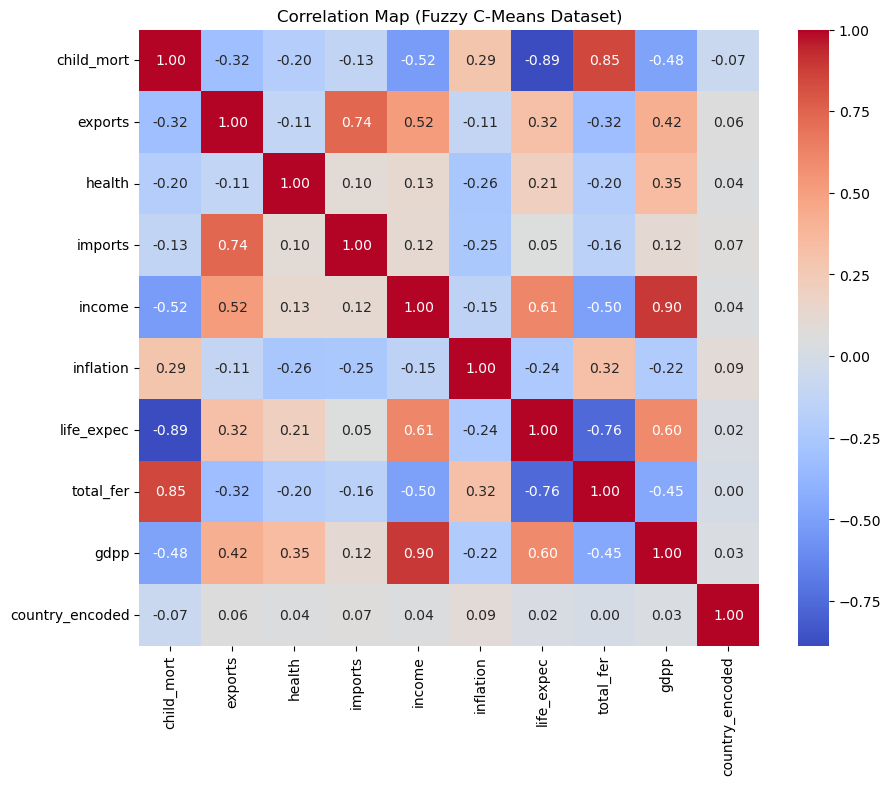

In [18]:
# Drop non-numeric columns (keep encoded country + numeric features)
numeric_df = df.drop(columns=['country'])

# Correlation matrix
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Map (Fuzzy C-Means Dataset)")
plt.show()

In [19]:
# Find the most correlated pair (excluding self-correlation)
corr_unstacked = corr.unstack()
sorted_corr = corr_unstacked.sort_values(kind="quicksort", ascending=False)

# Remove self correlations (value = 1.0)
sorted_corr = sorted_corr[sorted_corr < 1.0]

print("\nMost correlated features:")
print(sorted_corr.head(5))


Most correlated features:
income      gdpp          0.895571
gdpp        income        0.895571
child_mort  total_fer     0.848478
total_fer   child_mort    0.848478
exports     imports       0.737381
dtype: float64


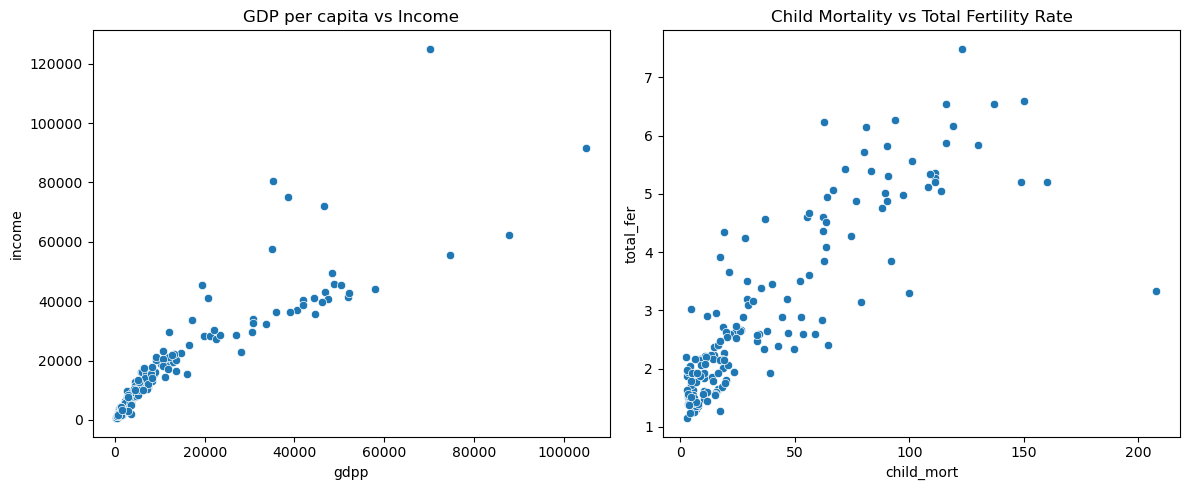

In [22]:
# Scatter plot for gdpp vs income
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(x='gdpp', y='income', data=df)
plt.title("GDP per capita vs Income")

# Scatter plot for child_mort vs total_fer
plt.subplot(1,2,2)
sns.scatterplot(x='child_mort', y='total_fer', data=df)
plt.title("Child Mortality vs Total Fertility Rate")

plt.tight_layout()
plt.show()

Scaling the dataset. (1 mark)

In [25]:
# Use only numeric features (drop original 'country')
X = df.drop(columns=['country'])

# Scale the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Scaled dataset shape:", X_scaled.shape)


Scaled dataset shape: (167, 10)


Apply Fuzzy C-Means Algorithm. **(2 marks)**

In [28]:
pip install scikit-fuzzy


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [34]:
import skfuzzy as fuzz

# Transpose the scaled dataset (skfuzzy expects features as rows)
X_scaled_T = X_scaled.T

# Apply Fuzzy C-Means with 3 clusters (from Elbow curve)
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X_scaled_T, c=3, m=2, error=0.005, maxiter=1000, init=None, seed=42
)

# Hard cluster labels (highest membership for each sample)
labels = np.argmax(u, axis=0)

print("Cluster labels:", np.unique(labels))
print("Fuzzy Partition Coefficient (FPC):", fpc)


Cluster labels: [0 1 2]
Fuzzy Partition Coefficient (FPC): 0.44154464629398815


In [36]:
# Merge predicted labels with the dataframe
df['FCM_cluster'] = labels

# Preview the updated dataframe
print(df[['country', 'FCM_cluster']].head())

               country  FCM_cluster
0          Afghanistan            1
1              Albania            0
2              Algeria            0
3               Angola            1
4  Antigua and Barbuda            0


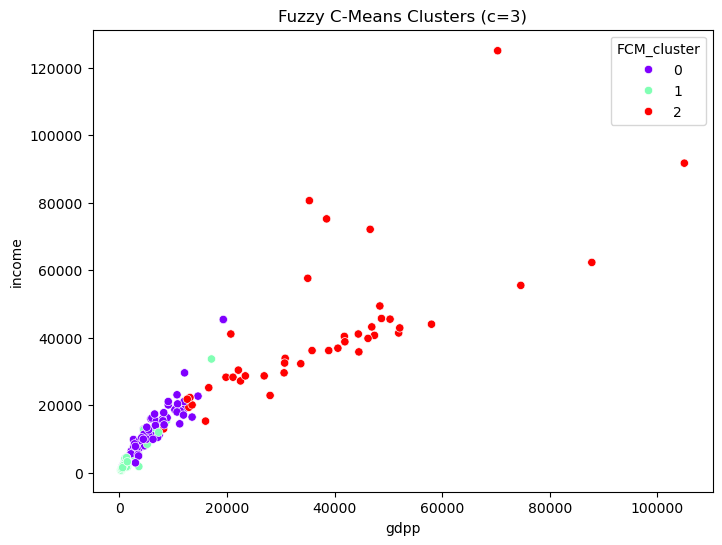

In [38]:
# Scatter plot for Fuzzy C-Means clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x='gdpp', y='income', hue='FCM_cluster', data=df, palette='rainbow')
plt.title("Fuzzy C-Means Clusters (c=3)")
plt.show()

## Fuzzy C‑Means Clustering
Fuzzy C‑Means clustering divided the dataset into three overlapping clusters, allowing each country to belong partially to multiple groups depending on its socio‑economic profile. Unlike DBSCAN’s hard boundaries, Fuzzy C‑Means provided soft membership values that captured the nuanced similarities between countries, such as those with mixed economic and demographic characteristics. This flexibility made it possible to see not only which cluster a country fits best but also how strongly it relates to other clusters, offering a more detailed and realistic view of global development patterns.